In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [3]:
data = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
data.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


reducing datasize

In [4]:
df=df.iloc[:1000000]
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


****Data Exploration****

In [5]:
data["prod_name"].value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [6]:
data["product_type_name"].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

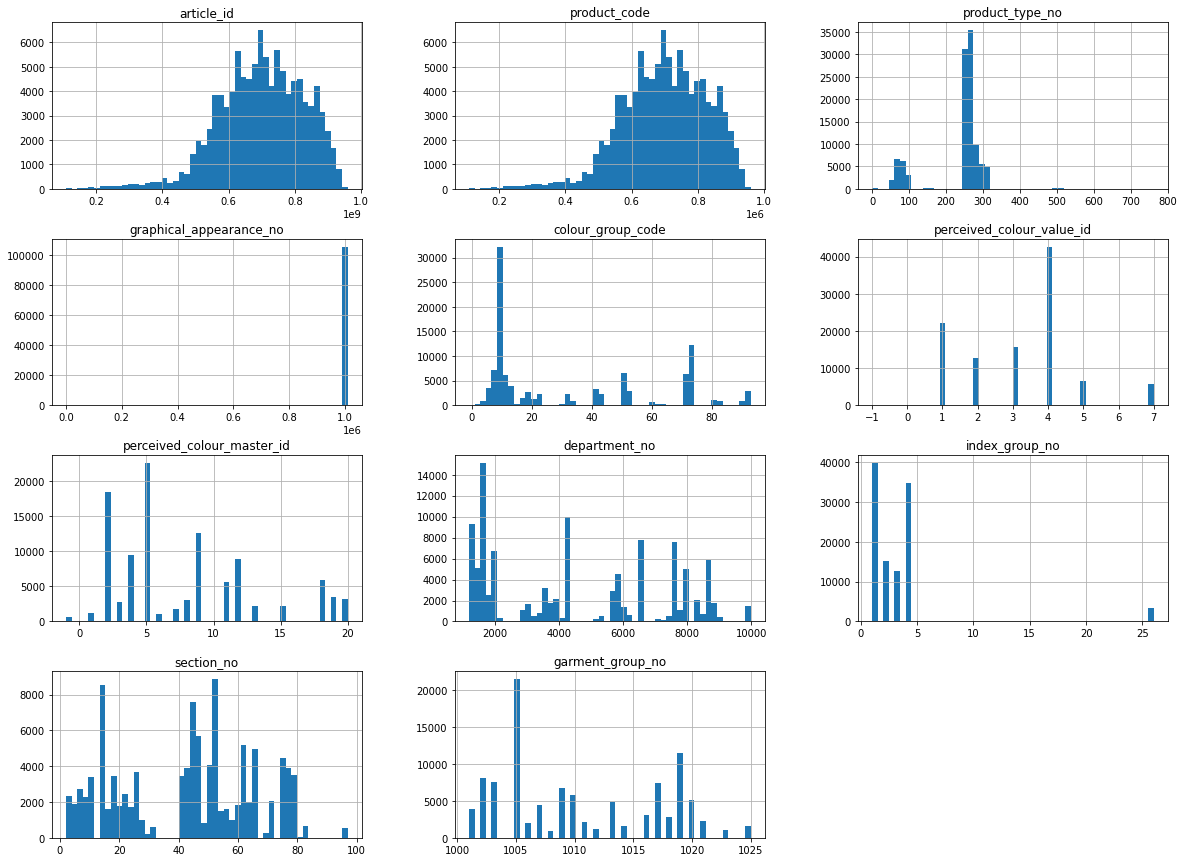

In [7]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
test_set.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
44708,681107007,681107,Dahlia,265,Dress,Garment Full body,1010017,Stripe,72,Blue,...,Kids Girl Dresses,H,Children Sizes 92-140,4,Baby/Children,76,Kids Girl,1014,Dresses/Skirts girls,Sleeveless dress in a patterned cotton weave w...
46626,686284001,686284,Santa sweater,252,Sweater,Garment Upper body,1010001,All over pattern,42,Red,...,Baby Boy Knitwear,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1003,Knitwear,Long-sleeved jumper in jacquard-knit cotton wi...
10907,544254002,544254,NEVADA,252,Sweater,Garment Upper body,1010001,All over pattern,9,Black,...,Jersey Fancy,F,Menswear,3,Menswear,20,Contemporary Smart,1005,Jersey Fancy,"Jumper in a soft, jacquard-knit cotton blend w..."
85490,820021001,820021,Pat ls bd oxford gingham,259,Shirt,Garment Upper body,1010004,Check,19,Greenish Khaki,...,Shirt,F,Menswear,3,Menswear,21,Contemporary Casual,1011,Shirts,Shirt in soft Oxford cotton with a button-down...
68433,754256001,754256,GREENVILLE high support bra,306,Bra,Underwear,1010016,Solid,9,Black,...,Ladies Sport Bras,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports bra in fast-drying functional fabric. V...


In [10]:
data3 = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
data3.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


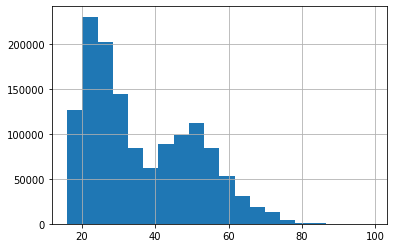

In [11]:
data3["age"].hist(bins=20, xlabelsize=10)
plt.show()

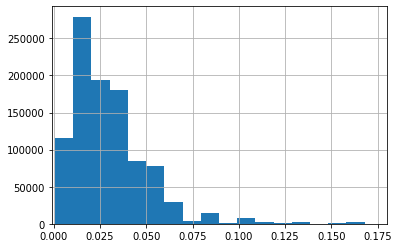

In [12]:
df["price"].hist(bins=60)
plt.axis([-0.001, 0.180, 0, None])
plt.show()

<AxesSubplot:>

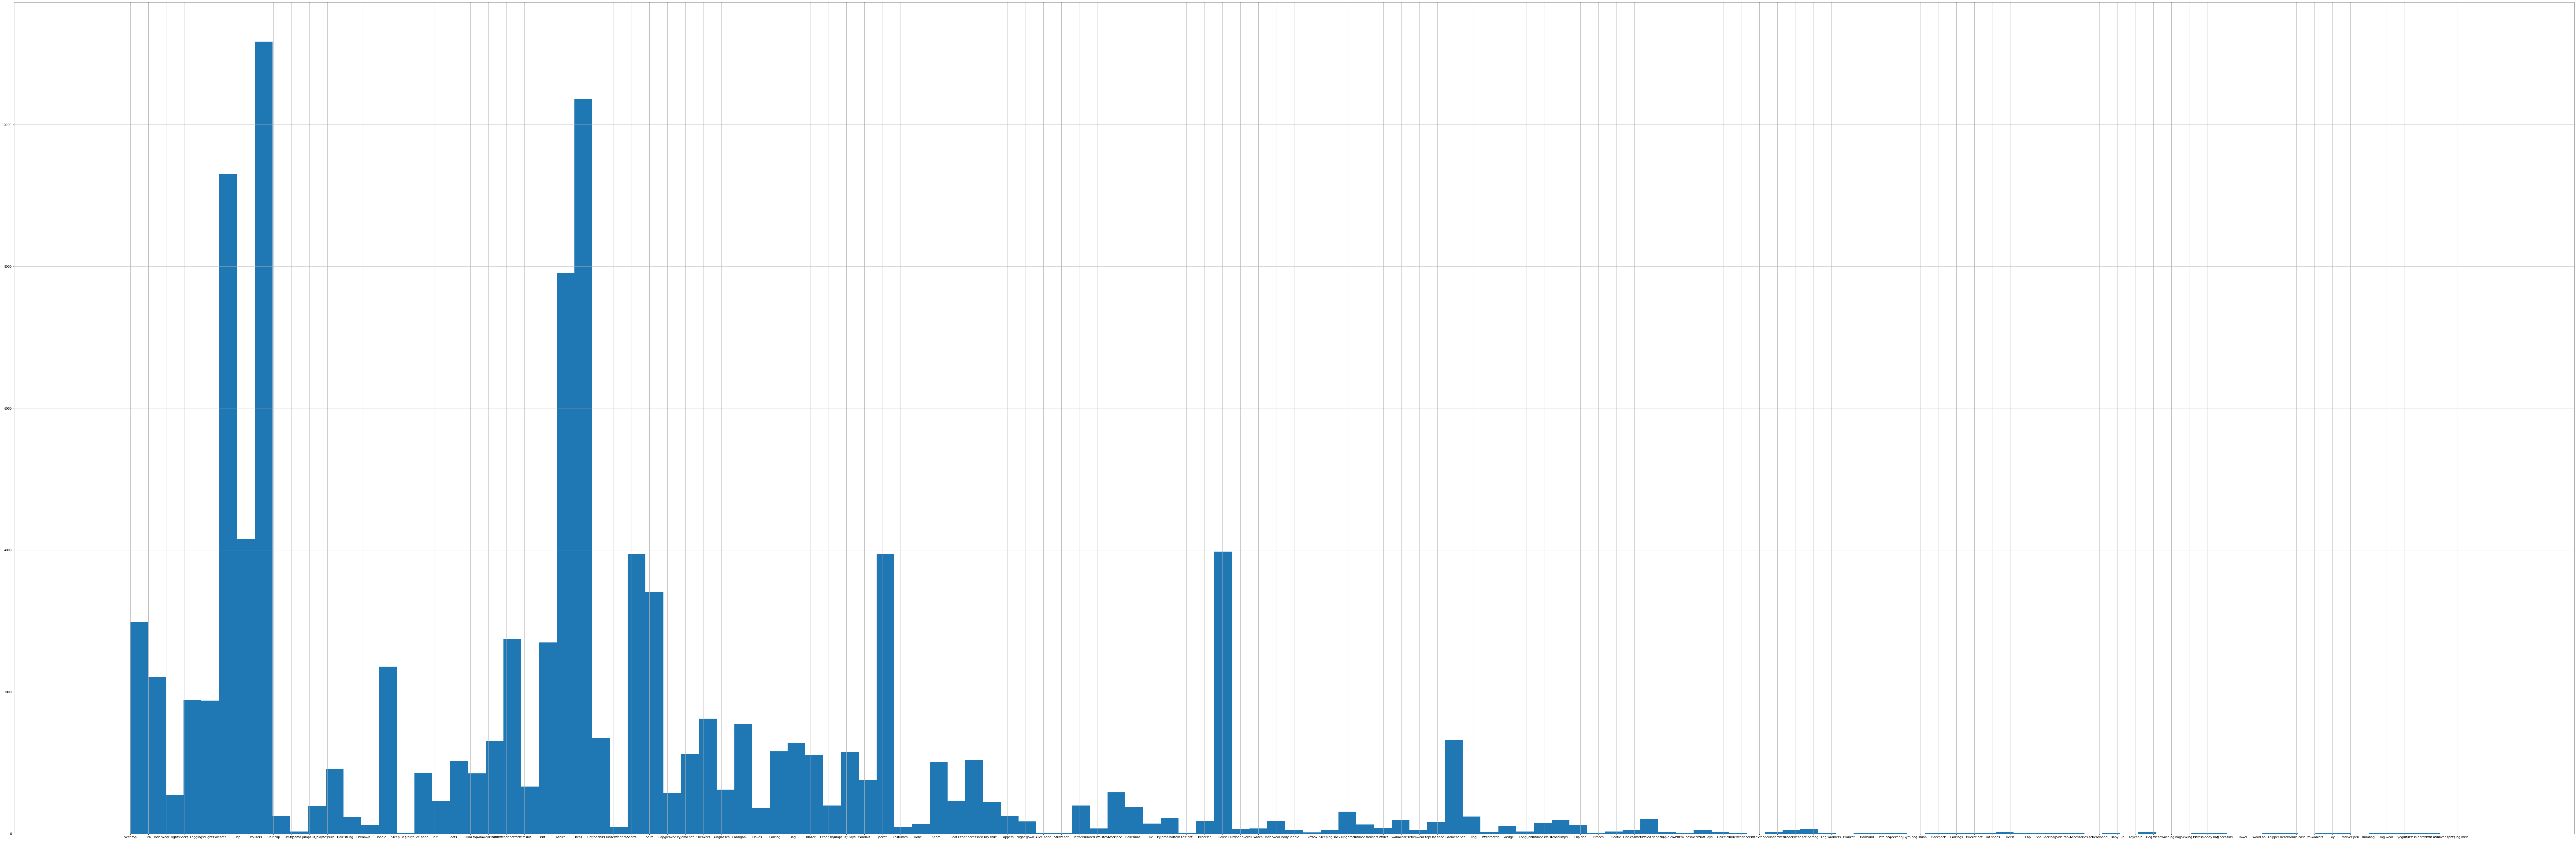

In [13]:
data["product_type_name"].hist(bins=131, figsize=(150, 50))

In [14]:
data3["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [15]:
data["garment_group_name"].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [16]:
data["colour_group_name"].value_counts()

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


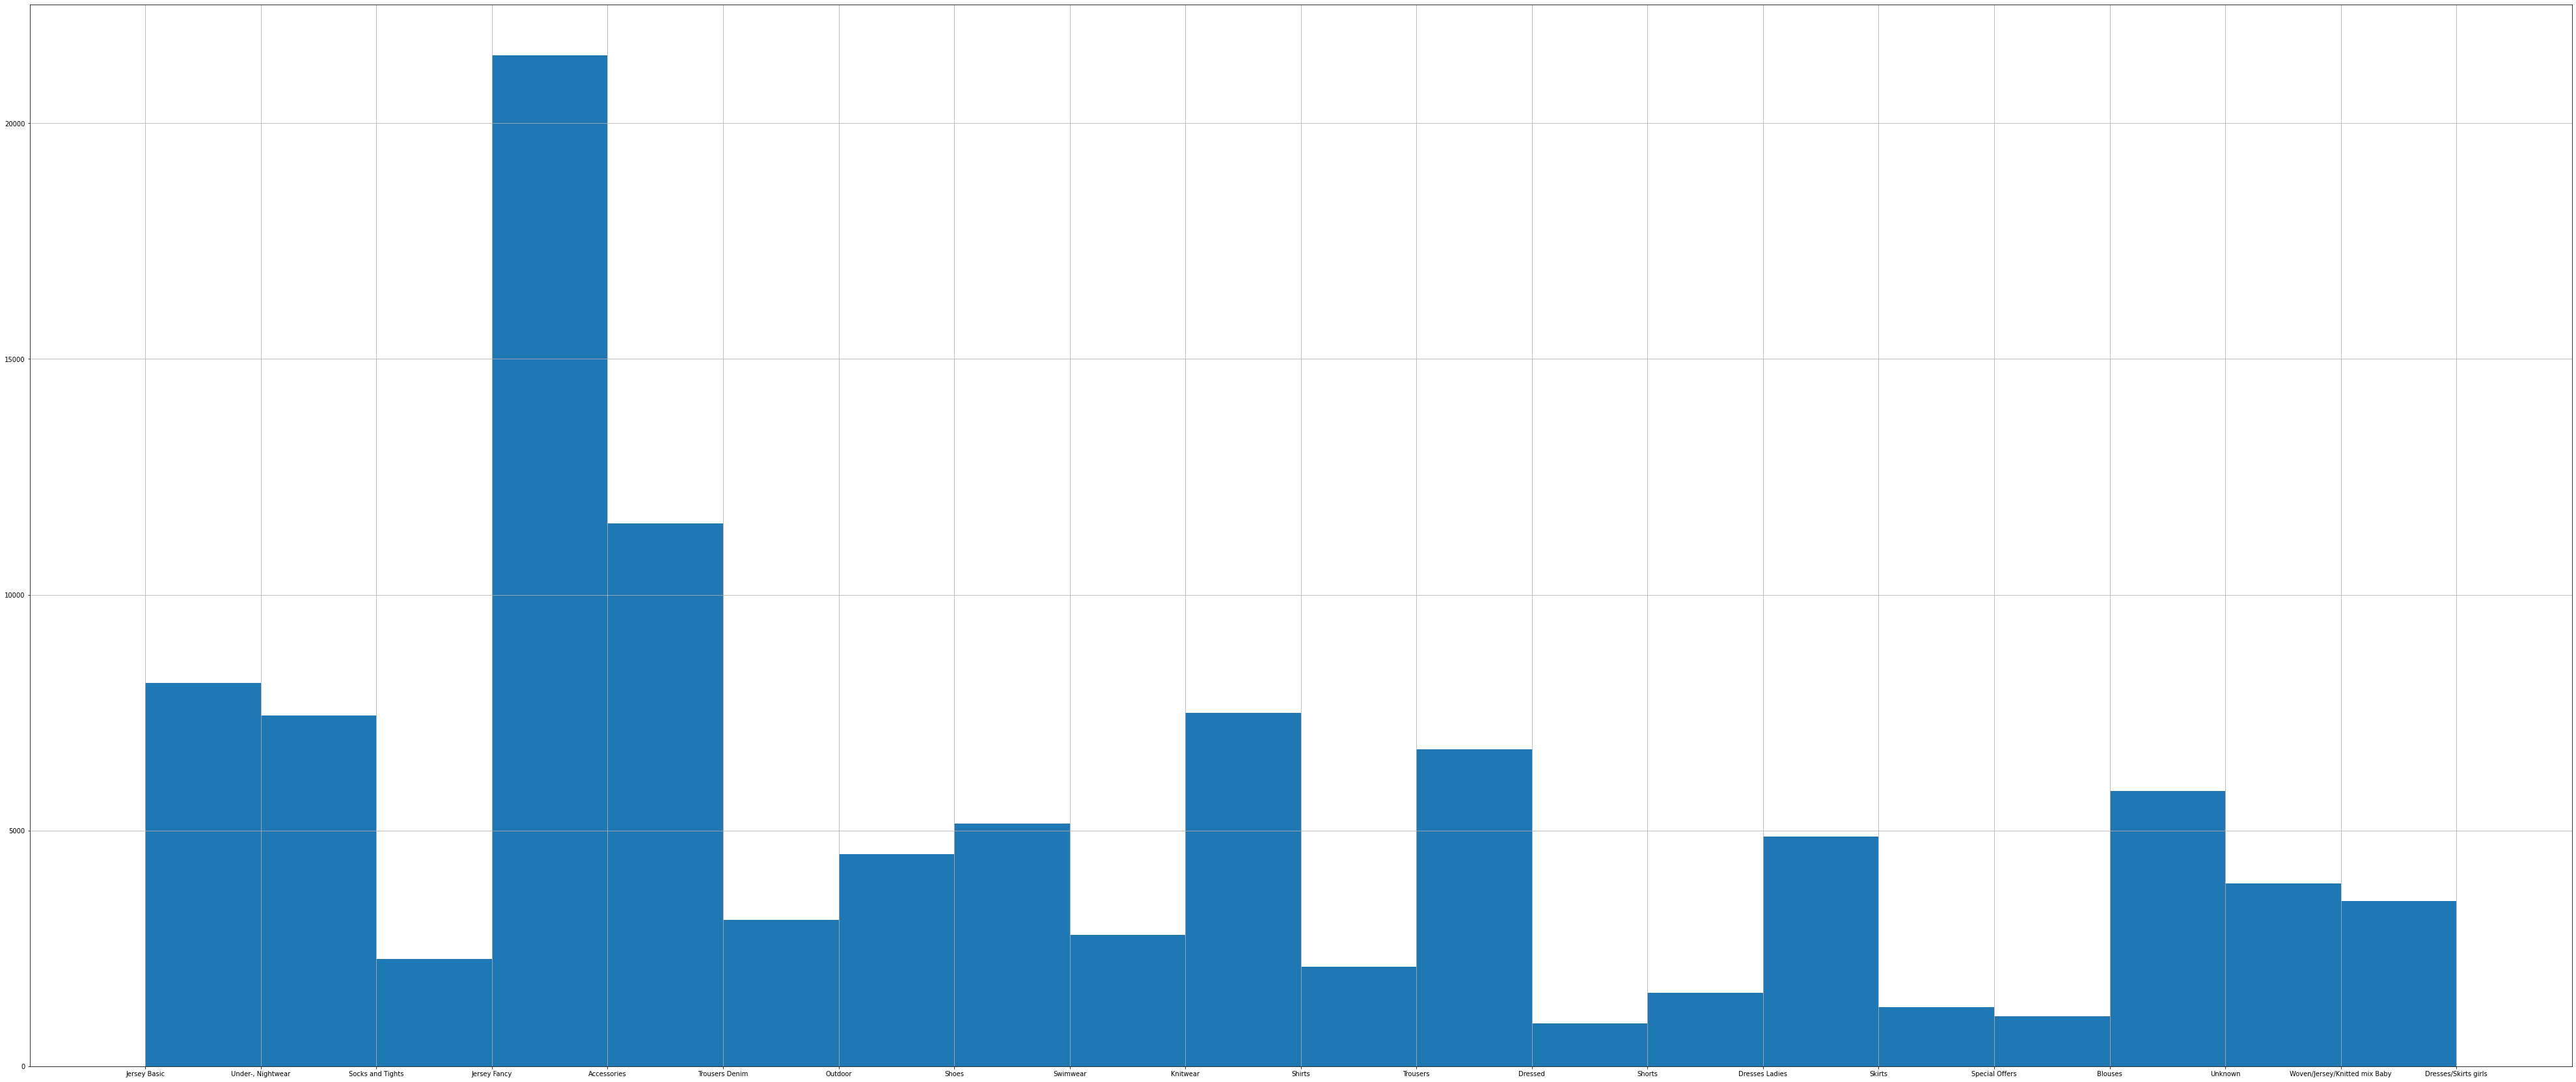

In [17]:
data["garment_group_name"].hist(bins=20, figsize=(70, 30))
plt.show()

****dropping unnecessary attributes****

In [18]:
df1=df.drop(["price", "sales_channel_id"], axis=1);
df1.head()

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004


****grouping wrt date and custumer id to cluster the items bought together****

In [19]:
df2 = df1.groupby(['t_dat', 'customer_id']);
df2.head(10)

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004
...,...,...,...
999995,2018-10-11,4615f5dbbdfc0cc1af245bc0397fd261659886c628f53f...,710899003
999996,2018-10-11,461802adf572dddc90bf68e441db0039809338e20768d7...,663942008
999997,2018-10-11,46193b292b8c4cbef8d2b75a75b92584c4fef588b07171...,573716033
999998,2018-10-11,46193b292b8c4cbef8d2b75a75b92584c4fef588b07171...,524825019


**creating the list of lists****


**containing list of items a customer bought together on a particular day**

In [20]:
prev = df1['customer_id'][0];
lst=[];
arr=[];
for i in df1.index:
    if df1['customer_id'][i]==prev:
        arr.append(df1['article_id'][i]);
    else:
        lst.append(arr);
        prev = df1['customer_id'][i]; 
        arr=[];
        arr.append(df1['article_id'][i]);
      
lst[:50]       

[[663713001, 541518023],
 [505221004, 685687003, 685687004, 685687001, 505221001],
 [688873012, 501323011, 598859003, 688873020, 688873011],
 [531310002, 529841001],
 [501820043,
  501820043,
  674681001,
  671505001,
  671505001,
  631848002,
  631848002,
  631848002,
  631848002,
  680187001,
  676827002,
  676827002,
  685687002,
  685687002,
  680912006,
  680912006,
  692454002,
  692454002,
  640639001,
  640639001,
  664421002,
  664421002,
  680912009,
  680912009,
  553139001,
  553139001,
  377277001,
  377277001,
  700819006,
  700819006],
 [397068015],
 [652075001, 670295001],
 [631744002, 562252035],
 [649356002, 579941002, 629760002, 625229004],
 [688545001],
 [673531001, 464277014, 464277014],
 [617322003, 617322003, 620405001, 678239001],
 [613456009,
  633675001,
  648719001,
  427114015,
  567475001,
  567594001,
  681358001,
  613456001,
  573937001,
  622745001,
  617322004],
 [507909001, 665481004],
 [211143037, 211143037, 503729006, 503729006],
 [662857005],
 [640

In [21]:
!pip install apyori  

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=cd06a5c6378e38c666573510416839fc36832bd15a9b1ad639a26c0e46e85e9e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


****applying the apriori algo****

In [22]:
from apyori import apriori
association_rules = apriori(lst, min_support=0.0003, min_confidence=0.2, min_lift=2, max_length=5)
association_results = list(association_rules)
association_results
# len(association_results)


[RelationRecord(items=frozenset({108775044, 108775015}), support=0.0006060584705480248, ordered_statistics=[OrderedStatistic(items_base=frozenset({108775015}), items_add=frozenset({108775044}), confidence=0.2113022113022113, lift=158.64491764491765), OrderedStatistic(items_base=frozenset({108775044}), items_add=frozenset({108775015}), confidence=0.45502645502645506, lift=158.64491764491765)]),
 RelationRecord(items=frozenset({111586001, 111593001}), support=0.00032064721406901313, ordered_statistics=[OrderedStatistic(items_base=frozenset({111586001}), items_add=frozenset({111593001}), confidence=0.20088300220750552, lift=91.21727505518764)]),
 RelationRecord(items=frozenset({160442010, 160442007}), support=0.0004122607038030169, ordered_statistics=[OrderedStatistic(items_base=frozenset({160442010}), items_add=frozenset({160442007}), confidence=0.37142857142857144, lift=179.5771720613288)]),
 RelationRecord(items=frozenset({458543001, 351484002}), support=0.0004615910444290189, ordered_

In [23]:
#sorting the products based on the frequency each has been bought with
df3 = df1.groupby(['article_id'])['customer_id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
ranked_products = df3['article_id'].to_list()
ranked_products[:30]

[539723005,
 399223001,
 692454002,
 573716012,
 610776002,
 562245001,
 685687004,
 637673005,
 685687003,
 565379001,
 685687001,
 372860001,
 685687002,
 539723006,
 539723001,
 591334003,
 524825013,
 108775015,
 501820001,
 683662005,
 568601006,
 507910001,
 662888002,
 399136009,
 399256001,
 539723003,
 501820004,
 660599001,
 524825010,
 228257001]

In [24]:
# creating a hashtable for the apriori suggestions with key as the product purchased
lookup_table = {}
for item in association_results:

    # First index of the inner list contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    to_print = "Rule: "
    arrow = " -> "
    for i in range(len(items)):
        to_print += str(items[i]) + arrow
        
#     # If we do not have 3 recommendations for our base product we will
#     # suggest top ranked products in addition
    if len(items) < 4:
        items_to_append = items
        i = 0
        while len(items) < 4:
            if ranked_products[i] not in items:
                to_print+=str(ranked_products[i])+arrow
                items_to_append.append(ranked_products[i])
            i += 1
    
    # Add the items to db, with base product separately from the products 
    # that are to be recommended
    lookup_table[items_to_append[0]] =items_to_append[1:]

    print(to_print)

#     # Print the support for this association rule
    print("Support: " + str(item[1]))

#     # Print the confidence and lift for this association rule

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 108775044 -> 108775015 -> 539723005 -> 399223001 -> 
Support: 0.0006060584705480248
Confidence: 0.2113022113022113
Lift: 158.64491764491765
Rule: 111586001 -> 111593001 -> 539723005 -> 399223001 -> 
Support: 0.00032064721406901313
Confidence: 0.20088300220750552
Lift: 91.21727505518764
Rule: 160442010 -> 160442007 -> 539723005 -> 399223001 -> 
Support: 0.0004122607038030169
Confidence: 0.37142857142857144
Lift: 179.5771720613288
Rule: 458543001 -> 351484002 -> 539723005 -> 399223001 -> 
Support: 0.0004615910444290189
Confidence: 0.28051391862955033
Lift: 335.9077241391773
Rule: 609719001 -> 351484002 -> 539723005 -> 399223001 -> 
Support: 0.0007998562372930328
Confidence: 0.4860813704496788
Lift: 283.26566532852013
Rule: 355072001 -> 355072002 -> 539723005 -> 399223001 -> 
Support: 0.0004968270020190204
Confidence: 0.2303921568627451
Lift: 261.5420980392157
Rule: 355569001 -> 355569002 -> 539723005 -> 399223001 -> 
Support: 0.00033121800134601356
Confidence: 0.5766871165644172
Li

In [25]:
# top3
lookup_table['default_recommendation'] = ranked_products[:3]
lookup_table

{108775044: [108775015, 539723005, 399223001],
 111586001: [111593001, 539723005, 399223001],
 160442010: [160442007, 539723005, 399223001],
 458543001: [351484002, 539723005, 399223001],
 609719001: [351484002, 539723005, 399223001],
 355072001: [355072002, 539723005, 399223001],
 355569001: [355569002, 539723005, 399223001],
 399223024: [399223001, 539723005, 692454002],
 399223001: [399223025, 539723005, 692454002],
 611415005: [429313006, 539723005, 399223001],
 529012025: [529008026, 539723005, 399223001],
 529008026: [611415005, 539723005, 399223001],
 678260005: [654564005, 539723005, 399223001],
 682965001: [539197011, 539723005, 399223001],
 539723005: [539723007, 399223001, 692454002],
 559630003: [559637005, 539723005, 399223001],
 562245001: [562245004, 539723005, 399223001],
 562245018: [562245004, 539723005, 399223001],
 565379001: [565379004, 539723005, 399223001],
 568601008: [568597009, 539723005, 399223001],
 568597016: [568601016, 539723005, 399223001],
 568601018: [

**Cosine similarity**

In [26]:
dfarticles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv');
dfarticles.shape

(105542, 25)

In [27]:
#taking the description attributes
articles_sub = dfarticles[['article_id','prod_name','product_type_name','product_group_name','graphical_appearance_name','colour_group_name'
                         ,'perceived_colour_value_name','perceived_colour_master_name','department_name','index_name','index_group_name'
                         ,'section_name','garment_group_name','detail_desc']]
articles_sub.shape

(105542, 14)

In [28]:
# Removing whitespaces
def remover(articles_sub):
    for i in articles_sub.columns:
        if articles_sub[i].dtype=='string':
            articles_sub[i]=articles_sub[i].map(str.strip)
        else :
            pass
remover(articles_sub)
articles_sub.head(3)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.


In [29]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from os import listdir
from os.path import isfile, join
from termcolor import colored
from IPython.display import HTML
from PIL import Image

import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [30]:
cols = ['prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']
articles_sub['combined'] = articles_sub[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
articles_sub['combined'].head()

0    Strap top Vest top Garment Upper body Solid Bl...
1    Strap top Vest top Garment Upper body Solid Wh...
2    Strap top (1) Vest top Garment Upper body Stri...
3    OP T-shirt (Idro) Bra Underwear Solid Black Da...
4    OP T-shirt (Idro) Bra Underwear Solid White Li...
Name: combined, dtype: object

In [31]:
articles_sub = articles_sub.loc[:10000]
articles_sub.shape

(10001, 15)

In [32]:
#keeping only the required attributes
#ie id and description
articles_final = articles_sub[['article_id','combined']]
articles_final.head()

,article_id,combined
0,108775015,Strap top Vest top Garment Upper body Solid Bl...
1,108775044,Strap top Vest top Garment Upper body Solid Wh...
2,108775051,Strap top (1) Vest top Garment Upper body Stri...
3,110065001,OP T-shirt (Idro) Bra Underwear Solid Black Da...
4,110065002,OP T-shirt (Idro) Bra Underwear Solid White Li...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
articles_final['combined'] = articles_final['combined'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(articles_final['combined'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(10001, 3877)

In [34]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
#data cleaning
indices = pd.Series(articles_final.index, index=articles_final['article_id']).drop_duplicates()

In [36]:
# Function that takes in article_id as input and outputs most similar articles
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the article that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all articles
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[:3]

    # Get the article indices
    article_indices = [i[0] for i in sim_scores]

    return articles_final['article_id'].iloc[article_indices]

In [37]:
prod = 108775044

# apriori
recom1=[]
recom2=[]
if prod in lookup_table.keys():
    for id in lookup_table[prod]:
        if id in indices:
            lst = list(get_recommendations(id))
            recom1.append(lst)

#cosine
if prod in indices:
    print("here")
    recom2=list(get_recommendations(prod))
#     recom2.append(lst)
print("Suggestions for the product: ", prod);
print("Recommendation given by apriori algorithm: ")
print(recom1)
print("Recommendation given by cosine algorithm: ")
print(recom2)

here
Suggestions for the product:  108775044
Recommendation given by apriori algorithm: 
[[108775015, 108775044, 108775051], [399223001, 399223029, 399223068]]
Recommendation given by cosine algorithm: 
[108775044, 108775051, 108775015]


In [38]:
def display_articles(article_ids):
    rows = 1 #len(article_ids)
    cols = 3
    image_path = "/kaggle/input/h-and-m-personalized-fashion-recommendations/images/"
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(len(article_ids)):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        try:
            image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            None
    print()

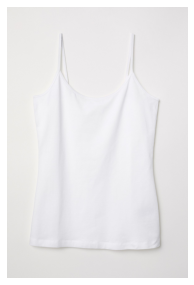

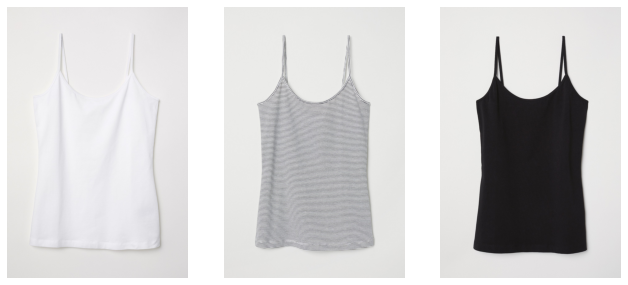

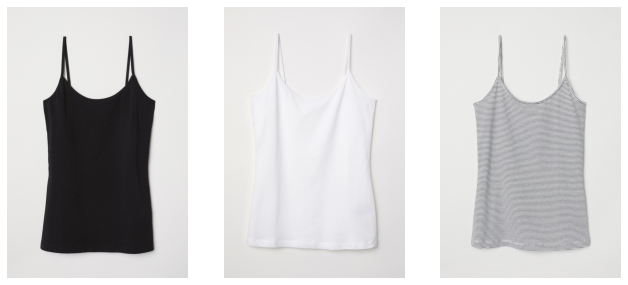

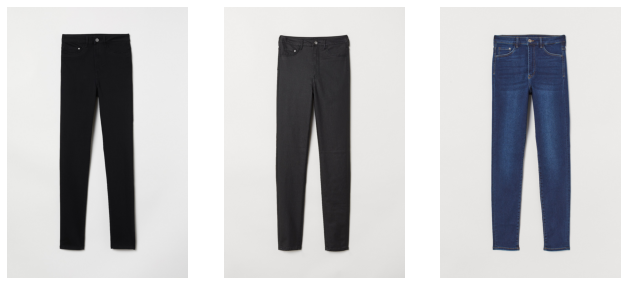

In [39]:
# print("PRODUCT IMAGE")
display_articles([108775044])

# print("COSINE SIMILARITY RESULTS")
display_articles(recom2)

# print("APRIORI SIMILARITY RESULTS")
for lst in recom1:
    display_articles(lst)